<a href="https://colab.research.google.com/github/lolhi/ML_Lec/blob/master/Hands-On%20Machine%20Learning/chap%204/4_6_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>## 라이브러리 사용
- import numpy as np
  - Numpy를 사용하기 위해 import 해준다
- from matplotlib import pyplot as plt
  - pyplot을 사용하기 위해 import 해준다.
- from sklearn import datasets
  - 사이킷런에 있는 datasets import

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets

>## Iris data 로드
- 붓꽃 데이터 로드


>---
>- iris = datasets.load_iris()
  - iris 변수에 iris 데이터 할당
- list(iris.keys())
  - Iris의 키 값 가져오기


In [0]:
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

>## 꽃잎의 너비(petal width)를 기반으로 Verginica 종 분류
- iris.DESCR의 내용을 기준으로 필요한 데이터와 label을 가져온다.


>---

>- iris["data"][:, 3:]
  - iris의 petal width 데이터 가져오기
- (iris["target"] == 2).astype(np.int)
  - verginica종인경우 1 나머지 0

In [0]:
X = iris["data"][:, 3:]
y = (iris["target"] == 2).astype(np.int)

>## 사이킷런을 이용한 로지스틱 회귀분석 훈련
- 사이킷런의 LogistircRegression 함수를 사용하여 로지스틱 회귀분석 훈련

>---

>- LinearRegression()
  - 사이킷런에서 제공하는 LogisticRegression 클래스
  - parameters
    - penalty : 규제 옵션(default='l2')
    - solver : 최적화 (default='liblinear')
      - 작은 데이터 : liblinear
      - 큰 데이터 : sag, saga
      - multi class problems : newton-cg, sag, saga, ibfgs
      - handle L2, no pernalty : newton-cg, sag, saga, ibfgs
      - handle L1 : liblinear, saga
      - elasticnet handle : saga
      - not handle no penalty : liblinaer
    - multi_class : 로지스틱 회귀에서 multi class 처리 옵션 (default : 'ovr')
      - ovr : 이진 분류
      - multinomial : 다중분류
      - auto : 자동선택
    - random_state : 데이터 셔플
  - Attribute
    - classes_ : class label 출력
    - intercept_ : 상수항 출력
    - coef_ : 계수 출력
  - 함수
    - fix(X,y) : Fit the model according to the given training data.
    - predict(self, X) : Predict class labels for samples in X.
    - predict_proba(self, X): Probability estimates.
    - score(self, X, y, sample_weight=None) : Returns the mean accuracy on the given test data and labels.

In [0]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="liblinear", random_state=42)
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

>## 모델의 추정 확률 계산
- 꽃잎의 너비가 0~3cm일때 추정 확률계산


>---
- log_reg.predict_proba(X_new)
  - X_new에 대한 확률 출력


array([1.61561562])

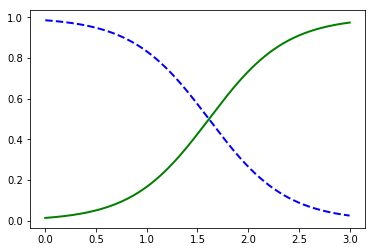

In [0]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")

>## 꽃잎의 너비(petal width)와 길이(length)를 기반으로 Verginica 종 분류
- iris.DESCR의 내용을 기준으로 필요한 데이터와 label을 가져온다.


>---

>- iris["data"][:, (2,3)]
  - iris의 petal width,length 데이터 가져오기

In [0]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

>## 사이킷런을 이용한 소프트맥스 회귀 훈련
- 사이킷런의 LogistircRegression 함수를 사용하여 소프트맥스 회귀 훈련

>---

>- LinearRegression()
  - 사이킷런에서 제공하는 LogisticRegression 클래스


In [0]:
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

>## 모델의 추정 확률 계산
- 꽃잎의 길이가 5cm, 너비가 2cm인 붓꽃 추정 확률계산


>---
- softmax_reg.predict_proba([[5, 2]])
  - 길이 5cm, 너비 2cm인 붓꽃이 각각 class에 속할 확률 출력
- log_reg.predict([5, 2])
  - [5,2]가 어느 class에 속할지 출력


In [0]:
print(softmax_reg.predict([[5, 2]]))
print(softmax_reg.predict_proba([[5, 2]]))

[2]
[[6.38014896e-07 5.74929995e-02 9.42506362e-01]]
